This notebook was created by Terence Broad, Senior Lecturer at UAL

# Basic Statistics

This week we're going to cover some basic approaches to summarising out datasets, as well as some core concepts in terms of what our data set actually represents, and in turn how that effects what we can say about the statistics we report. 

Our problem broadly is even with the dataset we will look at (which is in terms of data science, quite small), it quickly becomes impossible to accurately get an idea for what we can learn from the data by simply **looking at every value**. Even techniques which may have served us well in the past such as **plotting** can quickly become hard to draw precise conclusions from, especially when comparing **multiple subgroups**.

We'll see what stats we can use to help us scalably gain some insights, what they might tell us, what they might miss, and what they might be misrepresentative of. 

## Why do Basics Stats?

Basic statistics are a fundamental part of data analysis. Let me explain why and how they serve as building blocks for deeper analysis:

** Basic statistics provide the foundation for understanding your data by giving you essential information about its structure, distribution, and central tendencies. Here's why they're crucial:**

First, descriptive statistics help you get an initial grasp of your data. Mean, median, and mode tell you about central tendencies, while measures like standard deviation, variance, and range reveal the spread and variability. These metrics help you quickly identify patterns and potential outliers.

![Descriptive analysis](/Users/ysb1a23/Downloads/week3/media/desanalysis.png)


Second, basic stats enable data quality assessment. By looking at simple counts, missing values, and basic distributions, you can spot data issues early – like incorrect entries, skewed distributions, or incomplete records. This is essential before moving to more complex analyses.

Third, they guide your choice of further analytical methods. Understanding if your data is normally distributed, for example, helps you decide whether to use parametric or non-parametric tests. The presence of outliers might suggest the need for more robust statistical methods.

Basic statistics also provide context for more advanced techniques. For instance, before running a complex machine learning model, you need to understand your variables' distributions and relationships through correlation coefficients and basic hypothesis tests.

They're particularly valuable for communication too. When presenting findings to stakeholders, starting with basic statistical measures helps build a common understanding before diving into more sophisticated analyses. A simple mean or percentage change is often more interpretable than complex model coefficients.

### The Dataset 

First we're going to check out a dataset of **1000 musical tracks**, each representative of **one of 10 musical genres**. 

The version I am using was from [this Kaggle page](https://www.kaggle.com/insiyeah/musicfeatures), although they credit [Marsyas (Music Analysis, Retrieval and Synthesis for Audio Signals)](http://marsyas.info/) for the dataset. 

Essentially what we have is some audio features taken over the 30 second excerpts, telling us various things about the music ranging from the musical (``tempo`` and ``beats``) to the signal processing (``spectral_centroid`` and ``mfcc``). 

The intention is to use this dataset and these features to **train a classifier** to identify music genre, given an audio file that has been **pre-processed** to get these features. In order to do this, and to deal with potentially **different length audio tracks** (I imagine?), the values present are acutally **means over the whole track**. 

We're going to take a look at 
* What we can tell about each genre of music given these stats


* How much confidence we can have in them


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/music_features.csv")
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [3]:
#10 unique labels
df["label"].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [4]:
#100 for each genre
df["label"].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

### Samples and Populations 

If we are considering that any insights we find during this analysis could be generalised to wider findings about genres within music, from the very start, its worth acknowledging that what we have is a **sample** of a larger population of **all recorded music**.

This will often be the case with data collected, as it is mostly the case that it is **prohibitively expensive** or **impossible** to get measurements for the whole population. In these situations, we hope we can draw conclusions about the **wider population** based on our **smaller sample**. 

There are many issues that can arise when we choose our sample, including its size, and our selection criteria. In general, the bigger the sample, the better our analysis will be. 

This being said, a sample is often enough to get a good idea of the population. A.C. Nielsen Jr. famously said

```
“If you don’t believe in random sampling, the next time you have a blood test, tell the doctor to take it all.” – A.C. Nielsen Jr.
```


### Tempos 

So first lets look at how the tempo (given in **beats per minute**) is distributed across the whole dataset. 

To do this, its a good idea to look at a **histogram**. This looks like a fairly standard **normally distributed** set, as it follows a **bell shape**. It is centered around **the most frequent values**, with more extreme values becoming **less frequent** the further from the centre we go. 

In [5]:
#Using np.floor() to round all the values to nearest integer
tempos = np.floor(df["tempo"].values)

Text(0.5, 0, 'tempo(bpm)')

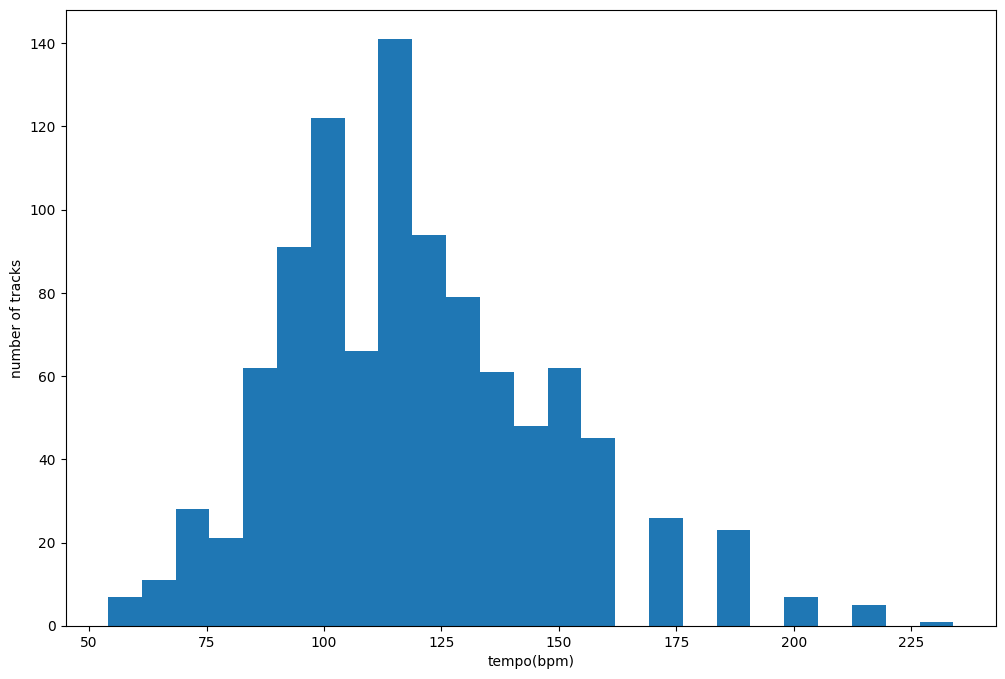

In [6]:
fig, ax = plt.subplots(figsize=(12,8)) 
number_of_bins = 25
#Plot histogram
h = ax.hist(tempos, bins=number_of_bins)
ax.set_ylabel("number of tracks")
ax.set_xlabel("tempo(bpm)")

### Central Tendency

Is just a fancy word for averages. 

We've seen these three types before, but as a recap 


1. Mean - The sum of all values, divided by the number of values. We can use the built in `mean()` function that comes with ``DataFrames``.


2. Mode - The most frequent value. There is not a function in `NumPy` to calculate this, however, we can use the `Counter` object imported from the `collections` package. This counts up the occurences of each unique item in the list. This then has a function `most_common()` which will give us the Mode.


3. Median - The middle value. We can use the built in `median()` function that comes with ``DataFrames``.


Given the distribution of the data, we can assume that these will all be quite near each other. 

In [7]:
from collections import Counter
#Mean
mean = df["tempo"].mean()
print(mean)
#Median
median = df["tempo"].median()
print(median)
#Mode
mode = Counter(tempos).most_common(1)[0][0]
print(mode)

119.60170189683186
117.45383522727272
123.0


### Individual Genres 

We can split up these tempo stats into their respective genres and see how they **vary between them**


### List Comprehensions
I'm going to use something called a List comprehension in this next step. These are a quick way of making new arrays. They follow the format 

`[function for item in list]`

This is the same as 

`
for item in list:
    function(item)
`

We can also save the result 

` new_list = [function(i) for i in old_list] `

Where `new_list` is the result of taking all of the elements in `old_list` and passing it as an argument to `function`. The code below does the same thing using a for loop.

`
new_list = []
for item in list:
    new_item = function(item)
    new_list.add(new_item)
`

### Colour maps

Ill use them to make an array of **ten colours** from a **colour map**. We can then use this array to keep consistent colours for each genre as we make different plots

[All possible colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [8]:
labels = df["label"].unique()

In [9]:
from matplotlib import cm

#Colour map gives use a continuous range of colours
colors = cm.get_cmap('tab20');

#List comprehension gets 10 colours from the colour map between 0 and 1 (e.g. 0, 0.1, 0.2, 0.3....)
colors_list = [colors(i) for i in np.linspace(0,1,10)]

colors_dict = {labels[i]:colors_list[i] for i in range(len(labels))}

/var/folders/7z/z23csxh13p75lh0y4lwsgfk40000gn/T/ipykernel_62443/2582150340.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20');


### ``df.groupby()``

The function ``.groupby()`` can be called on a dataframe to **collect together items based on a given column**. We can then use these groups to calculate **aggregate statistics** (such as mean). Here we use this technique to quickly plot the **mean tempo for each genre**. 

All full list of possible stats that can be used in conjunction with ``.groupby()`` can be found on the [Pandas documentation](https://pandas.pydata.org/docs/reference/groupby.html?highlight=stats#), with this [aggregate stats guide](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html) also useful.

This looks like there is not much difference between the tempos for each genre, but I don't think this tells the whole story. 

In [10]:
grouped = df.groupby("label")

Check the structure of grouped and verify its type:

In [11]:
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Verify the column tempo in the original DataFrame before grouping:

In [12]:
print(df["tempo"].dtypes)
print(df["tempo"].head())

float64
0    103.359375
1     95.703125
2    151.999081
3    184.570312
4    161.499023
Name: tempo, dtype: float64


After applying a groupby operation, aggregate or transform the data to make it usable:

In [13]:
df["tempo"] = pd.to_numeric(df["tempo"], errors="coerce")

In [14]:
print(grouped["tempo"].head())

0      103.359375
1       95.703125
2      151.999081
3      184.570312
4      161.499023
100     92.285156
101    161.499023
102    143.554688
103     95.703125
104    123.046875
200    129.199219
201    117.453835
202    112.347147
203     92.285156
204     80.749512
300    129.199219
301    112.347147
302    129.199219
303    107.666016
304    123.046875
400    198.768029
401     71.777344
402     95.703125
403    117.453835
404     95.703125
500     64.599609
501    129.199219
502     73.828125
503    151.999081
504    107.666016
600    117.453835
601     92.285156
602    117.453835
603    135.999178
604    172.265625
700    117.453835
701     78.302557
702    107.666016
703    103.359375
704    103.359375
800    161.499023
801    151.999081
802     89.102909
803    143.554688
804    172.265625
900    117.453835
901    123.046875
902    143.554688
903    117.453835
904    135.999178
Name: tempo, dtype: float64


You can also reset the index for better readability:

In [15]:
mean_tempos = grouped["tempo"].mean()
print(mean_tempos)

label
blues        120.742207
classical    127.032280
country      110.858840
disco        120.341798
hiphop       113.976295
jazz         115.068143
metal        125.610877
pop          112.759957
reggae       129.364182
rock         120.262441
Name: tempo, dtype: float64


In [41]:
df["tempo"] = pd.to_numeric(df["tempo"], errors="coerce")

In [16]:
mean_tempos = mean_tempos.reset_index()
print(mean_tempos)

       label       tempo
0      blues  120.742207
1  classical  127.032280
2    country  110.858840
3      disco  120.341798
4     hiphop  113.976295
5       jazz  115.068143
6      metal  125.610877
7        pop  112.759957
8     reggae  129.364182
9       rock  120.262441


### Taking a closer look

Taking a quick look I'd say 

* ``Disco`` has the least variation. Most values seem to be tightly packed around 120 bpm


* ``Classical`` and ``Blues`` seem to have the biggest spread of variations 


* ``Hip hop`` seems to have two pockets of tempo, one around 100bpm, then a few out towards the extremes of 200bpm


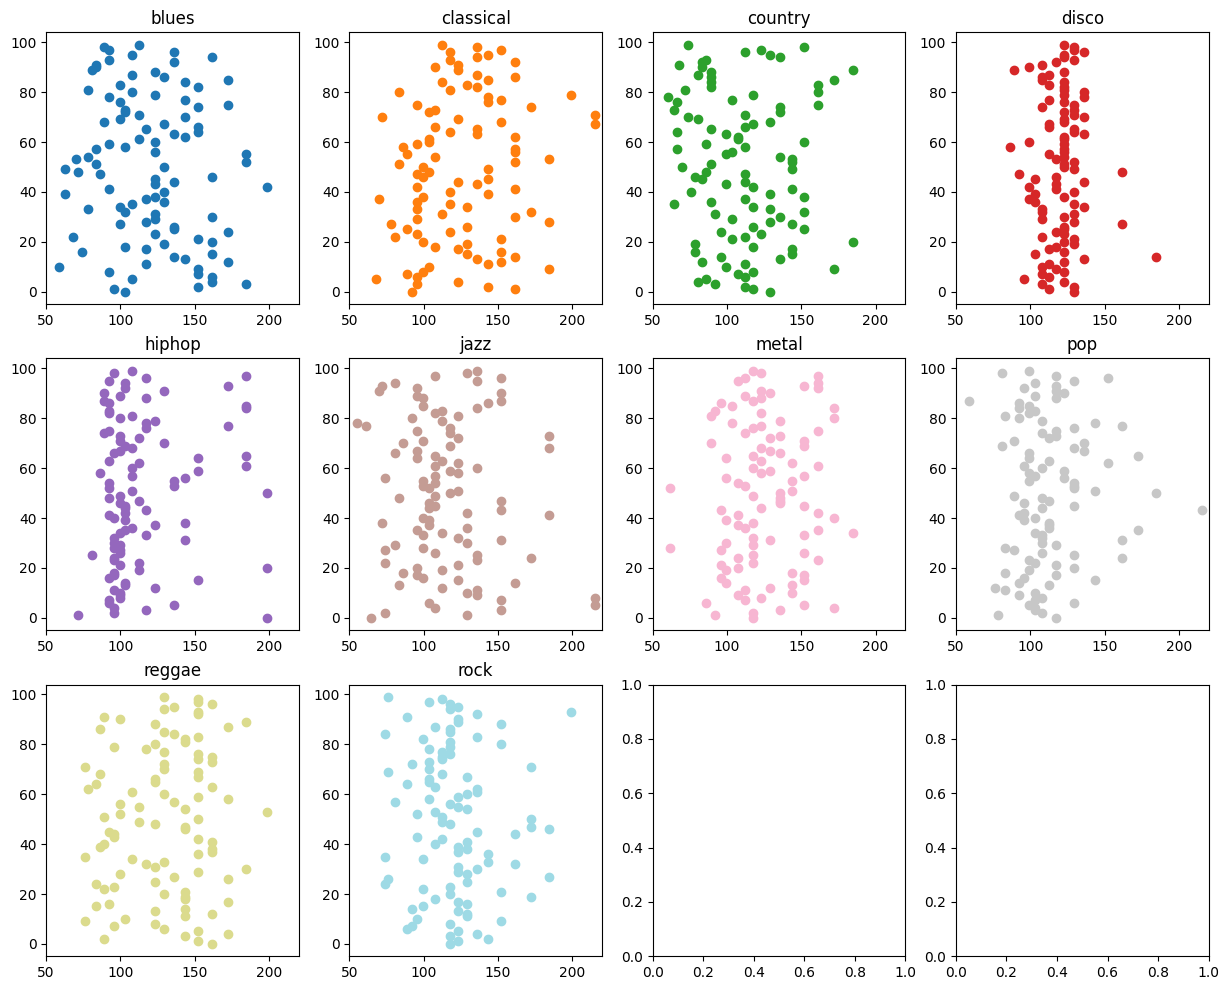

In [17]:
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(15,12))

for i,label in enumerate(labels):
    tempos = df[df["label"]==label]["tempo"].values
    col = i%cols
    row = int(np.floor(i/cols))
    axis = ax[row,col]
    axis.plot(tempos,np.arange(len(tempos)), "o", color=colors_list[i], ms = 6)
    axis.set_title(label)
    #Set the bounds on the x axis so all graphs are comparable
    axis.set_xlim((50,220))

/var/folders/7z/z23csxh13p75lh0y4lwsgfk40000gn/T/ipykernel_62443/1603421926.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20');


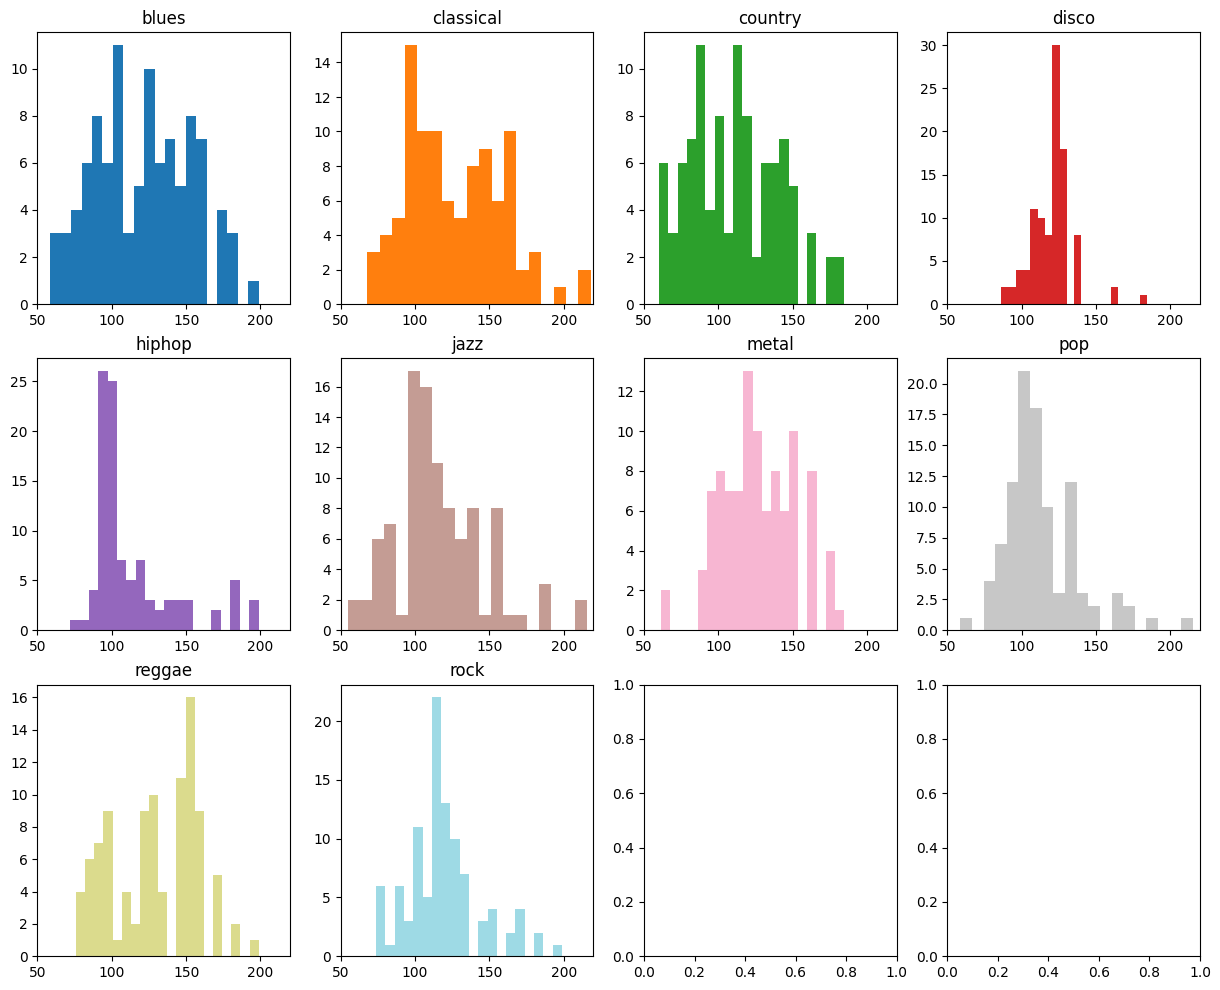

In [18]:
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(15,12))
colors = cm.get_cmap('tab20');
for i,label in enumerate(df["label"].unique()):
    tempos = df[df["label"]==label]["tempo"].values
    col = i%cols
    row = int(np.floor(i/cols))
    axis = ax[row,col]
    number_of_bins = 20
    h = axis.hist(tempos, bins=number_of_bins,color=colors_list[i])
    axis.set_title(label)
    #Set the bounds on the x axis so all graphs are comparable
    axis.set_xlim((50,220))

### Skewed by a second group 

We can see from the plot of the ``hip hop`` category that although there is a strong centre of lots of songs around a fairly narrow range of tempos, there are also a few outliers in a second group towards the extremes (approx 15% of the tracks). 

As expected, this produces greater differences between the measures of central tendency. The difference between the mean and median is about 12%, as opposed to closer to 1-2% for the combined tempos .The **extreme values** skew the mean high, and in this case, median is a more accurate reflection of the dataset.

In [19]:
hiphop = df[df["label"]=="hiphop"]["tempo"]

In [20]:
#Mean
mean = hiphop.mean()
print(mean)
#Median
median = hiphop.median()
print(median)

113.97629508254998
103.359375


### Problems with the Mode

``Classical`` has a better spread so its mean and median values are fairly close, however, we'll see how this big spread can actually make the mode a pretty much useless measure. 

Taken as normally, we could see that the mode (the most commonly occuring tempo), is in fact 161bpm. This is much more different than the mean (127bpm) and median (123bpm). 

If we dig a little deeper and look at the **3 most common tempos**, we see that actually 95bpm also has 10 items, and 143 bpm has 9. These quite widely different tempos all appear basically the same number of times, so it hard to take any of them individually as representative of that particular statistic.

In [21]:
classical = df[df["label"]=="classical"]["tempo"]

In [22]:
#Mean
mean = classical.mean()
print(mean)
#Median
median = classical.median()
print(median)
#Most common 3 tempos
mode = Counter(np.floor(classical)).most_common(3)[:3]
print(mode)

127.03227966517508
123.046875
[(161.0, 10), (95.0, 10), (143.0, 9)]


## Measures of Variation 

Beyond trying to get one value that might represent the **central tendency** of our sample, we have also been noting some differences in how the values are distributed across the set. We can also frame this as how they **vary across the sample**. 

Whilst it can be useful to look at a plot and try to discern these things are above, it can also be more useful,  exact and scalable (its already getting quite hard to eyeball and compare across 10 different plots!) to get some statistics which describe this variation.

### Range 

The range is calculated as 

``
max-min
``

And this tells us what the difference between the **fastest** and **sloweset** tracks is for each genre. Whilst this does give us an interesting overview of the spread of data, as it is only calculated based on **two values from the set**, it is definitely liable to be effected by **outliers**. 

#### ``df.group.apply()``

Since there is **no range** function built into ``Pandas`` for groups, we can use the ``apply()`` function to write a **custom function**. 

Here, we write our own function which is applied to **each group in turn** and returns the desired calculation. After composing a function that takes subtracts the maximum tempo from the minimum tempo, we pass it as an argument to the ``apply()`` function. 

Here we can really see how a custom function can be thought of as a **variable that holds code**, instead of one that represents numbers, text or other objects.

```
def tempo_range(x):
    return x["tempo"].max() - x["tempo"].min()
                                
range_tempos = grouped.apply(tempo_range).sort_values()
```

We can see this manifested in the ``Pop`` genre, as it has one of the biggest ranges, but appears that the majority of tracks are actually around a fairly narrow band around 100bpm. 

This is opposed to ``Classical`` and ``Blues``, which have high ranges, but appear to be more equally spread across that range. Again, beyond eyeballing the graph to see this, it would be great to have a more statistical measure of this. Bringing in **Variance** and **Standard Deviation**

/var/folders/7z/z23csxh13p75lh0y4lwsgfk40000gn/T/ipykernel_62443/2117886328.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  range_tempos = grouped.apply(tempo_range).sort_values()


<BarContainer object of 10 artists>

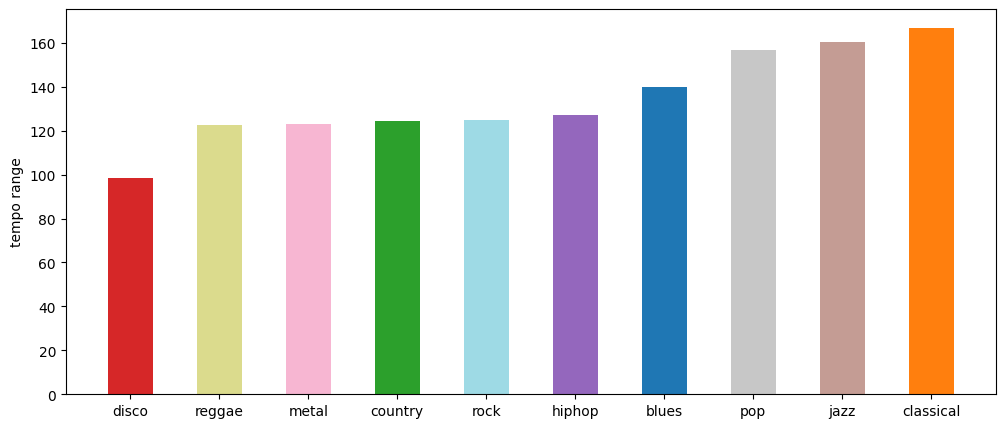

In [23]:
def tempo_range(x):
    return x["tempo"].max() - x["tempo"].min()

#Get range from grouped items
range_tempos = grouped.apply(tempo_range).sort_values()

#Plot
sorted_colors = [colors_dict[i] for i in range_tempos.index]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("tempo range")
ax.bar(range_tempos.index,range_tempos,0.5,color =sorted_colors)

### Variance 

Variance is the **mean of the squared distance from the mean**.

So this tells us over the whole sample how far the individual measurements are from the average. For something like ``Disco``, where most measurements are close to the mean, we would expect a small variance. For something like ``Classical``, where the measurements are quite equally spread apart from the mean, we would expect a high variance.

![fishy](../images/variance.png)

#### Why square?

We square the difference to 

* Avoid negative a positive differences cancelling each other out. 


* To accentuate larger differences. 

### Standard Deviation 

The standard deviation is **the square root of the variance**. There a few nice properties of doing this that make standard deviation the most popular statistic for reporting the amount of variation within a sample. 

We won't go into them in detail but one obivous and intuitive one is that **the standard deviation and the original measurement are in the same units**. Whereas, the variance is the in the units squared (e.g cm -> cm2). 


What we see when we compare range against standard deviation for each genre is that 

* ``Pop`` has one of the biggest ranges but one of the smallest standard deviations. 


* ``Classical`` and ``Blues`` both have the highest standard deviations, representing the larger amount of variation **throughout the whole set**


* ``Reggae`` has a comparatively lower standard deviation (in terms of its ranking within the genres) than range. This is possibly attributed to the fact it has what looks like 3 clusters across the wide range of tempos, as opposed to them being equally distributed across that range.

## Tasks 

### 1

Using ``df.group.apply()`` and you're own custom function, plot the **absolute difference** between the mean and median tempo for each genre as a bar chart. 


/var/folders/7z/z23csxh13p75lh0y4lwsgfk40000gn/T/ipykernel_62443/3695801580.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mm_diff = grouped.apply(mm_diff).sort_values()


<BarContainer object of 10 artists>

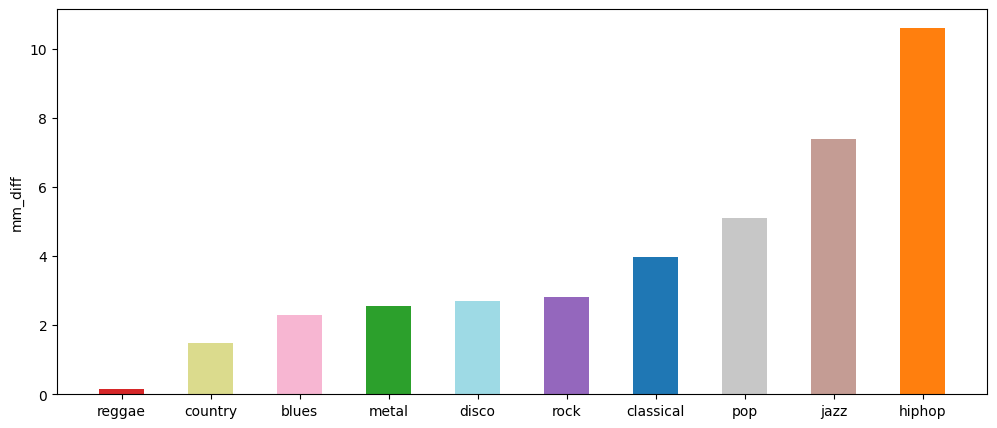

In [24]:
#1
grouped = df.groupby("label")
def mm_diff(tracks_for_genre):
    return np.abs(tracks_for_genre["tempo"].mean() - tracks_for_genre["tempo"].median())

#Get stats from grouped items
mm_diff = grouped.apply(mm_diff).sort_values()

#Plot
sorted_colors = [colors_dict[i] for i in range_tempos.index]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("mm_diff")
ax.bar(mm_diff.index,mm_diff,0.5,color =sorted_colors)

### 2

1. Make a list comprehension that returns the odd numbers from 0-100. [Hint](https://www.jquery-az.com/python-modulo/)
2. Make a list comprehension that returns the first 10 [triangluar number](https://en.wikipedia.org/wiki/Triangular_number). [Hint](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)
3. Make a list comprehension that given a list of numbers between 0 and 1, returns a thresholded list where everything that is above 0.5 goes to 1, everything that is below 0.5 goes to 0. [Hint](https://realpython.com/python-conditional-statements/#conditional-expressions-pythons-ternary-operator)


```
lots_of_beats = []
for i, track in df.iterrows():
    if track["beats"] > 95:
        lots_of_beats.append(track["filename"])
```

In [55]:
###2.1
a = [i for i in np.arange(0,100) if i % 2 == 1 ]
print(a)

[np.int64(1), np.int64(3), np.int64(5), np.int64(7), np.int64(9), np.int64(11), np.int64(13), np.int64(15), np.int64(17), np.int64(19), np.int64(21), np.int64(23), np.int64(25), np.int64(27), np.int64(29), np.int64(31), np.int64(33), np.int64(35), np.int64(37), np.int64(39), np.int64(41), np.int64(43), np.int64(45), np.int64(47), np.int64(49), np.int64(51), np.int64(53), np.int64(55), np.int64(57), np.int64(59), np.int64(61), np.int64(63), np.int64(65), np.int64(67), np.int64(69), np.int64(71), np.int64(73), np.int64(75), np.int64(77), np.int64(79), np.int64(81), np.int64(83), np.int64(85), np.int64(87), np.int64(89), np.int64(91), np.int64(93), np.int64(95), np.int64(97), np.int64(99)]


or

In [56]:
###2.1 (alternative)
a = [i * 2 + 1 for i in np.arange(0,50)]
print(a)

[np.int64(1), np.int64(3), np.int64(5), np.int64(7), np.int64(9), np.int64(11), np.int64(13), np.int64(15), np.int64(17), np.int64(19), np.int64(21), np.int64(23), np.int64(25), np.int64(27), np.int64(29), np.int64(31), np.int64(33), np.int64(35), np.int64(37), np.int64(39), np.int64(41), np.int64(43), np.int64(45), np.int64(47), np.int64(49), np.int64(51), np.int64(53), np.int64(55), np.int64(57), np.int64(59), np.int64(61), np.int64(63), np.int64(65), np.int64(67), np.int64(69), np.int64(71), np.int64(73), np.int64(75), np.int64(77), np.int64(79), np.int64(81), np.int64(83), np.int64(85), np.int64(87), np.int64(89), np.int64(91), np.int64(93), np.int64(95), np.int64(97), np.int64(99)]


In [57]:
#2.2
#Sum the list of numbers from 1-i each time
a = [np.sum(np.arange(i)) for i in np.arange(2,12)]
print(a)

[np.int64(1), np.int64(3), np.int64(6), np.int64(10), np.int64(15), np.int64(21), np.int64(28), np.int64(36), np.int64(45), np.int64(55)]


In [58]:
#2.3
a = np.random.random(100)
#Use in place conditional 
a = [1 if i > 0.5 else 0 for i in a]
print(a)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
